# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
#seu código aqui
# A seguir, importaremos as bases, conforme solicitado acima:
X_train = pd.read_csv("G:/Meu Drive/PEDRO SMS -TI 2025/Diversos 2025/EBAC/X_train_balanced.xls", delimiter=',')
y_train = pd.read_csv("G:/Meu Drive/PEDRO SMS -TI 2025/Diversos 2025/EBAC/y_train_balanced.xls", delimiter=',')
X_test = pd.read_csv("G:/Meu Drive/PEDRO SMS -TI 2025/Diversos 2025/EBAC/X_test.xls", delimiter=',')
y_test = pd.read_csv("G:/Meu Drive/PEDRO SMS -TI 2025/Diversos 2025/EBAC/y_test.xls", delimiter=',')


In [3]:
# A seguir a verificação usando o 'shape':
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (252, 10)
Tamanho de X_test: (41, 10)
Tamanho de y_train: (252, 1)
Tamanho de y_test: (41, 1)


In [ ]:
# Conforme impresso acima, observamos que o número de linhas condiz.

In [4]:
# A seguir, vamos verificar as variáveis dos nossos DataFrames:
X_train

,Age,Income,Number of Children,Gender_encoded,Marital Status_encoded,Home Ownership_encoded,Education_BACHELOR'S DEGREE,Education_DOCTORATE,Education_HIGH SCHOOL DIPLOMA,Education_MASTER'S DEGREE
0,26.000000,4.500000e+06,0,0,1,1,0,0,0,0
1,29.000000,2.750000e+06,0,0,1,1,0,0,1,0
2,25.000000,6.250000e+06,0,0,1,1,1,0,0,0
3,29.000000,6.800000e+06,2,0,0,0,0,1,0,0
4,31.000000,6.500000e+06,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
247,29.950365,4.370347e+06,0,0,1,1,0,0,0,0
248,34.000000,4.750000e+06,0,1,1,1,0,0,0,0
249,30.130492,5.750000e+06,0,0,1,1,0,0,0,0
250,25.000000,6.006355e+06,0,0,1,1,1,0,0,0


In [5]:
X_test

,Age,Income,Number of Children,Gender_encoded,Marital Status_encoded,Home Ownership_encoded,Education_BACHELOR'S DEGREE,Education_DOCTORATE,Education_HIGH SCHOOL DIPLOMA,Education_MASTER'S DEGREE
0,25.0,5500000.0,0,0,1,1,1,0,0,0
1,48.0,8750000.0,1,0,0,0,0,1,0,0
2,26.0,5500000.0,1,0,0,0,1,0,0,0
3,39.0,6250000.0,2,0,0,0,1,0,0,0
4,35.0,9000000.0,1,0,0,0,0,1,0,0
5,25.0,5500000.0,0,0,1,1,1,0,0,0
6,48.0,8250000.0,1,0,0,0,0,1,0,0
7,48.0,8250000.0,1,0,0,0,0,1,0,0
8,36.0,9500000.0,2,0,0,0,0,0,0,1
9,37.0,9500000.0,1,0,0,0,0,0,1,0


In [6]:
y_train

,Credit Score
0,2
1,1
2,2
3,2
4,2
...,...
247,2
248,2
249,2
250,2


In [7]:
y_test

,Credit Score
0,2
1,3
2,2
3,3
4,3
5,2
6,3
7,3
8,3
9,3


In [ ]:
# Conforme impresso acima, observamos que a variável a ser predita é a 'Credit Score', que assume o valor de 'y'.

In [8]:
# A seguir calcularemos e imprimiremos as porcentagens dos valores na coluna 'Credit Score' na base de treinamento:
print((y_train['Credit Score'].value_counts(normalize=True) * 100))

Credit Score
2    33.333333
1    33.333333
3    33.333333
Name: proportion, dtype: float64


In [ ]:
# Conforme impresso acima, nota-se que a varável 'Credit Score' está balanceada na base de treino (y_train).

In [9]:
print((y_test['Credit Score'].value_counts(normalize=True) * 100))

Credit Score
3    70.731707
2    14.634146
1    14.634146
Name: proportion, dtype: float64


In [ ]:
# Conforme impresso acima, nota-se que a varável 'Credit Score' não está balanceada na base de teste (y_test).

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [ ]:
#Sua resposta aqui
# Após o carregamento das bases de treino e teste, como as bibliotecas já foram importadas previamente, o próximo passo é a aplicação do algoritimo de árvore de decisão aos dados de treinamento;
# Nesta estapa utilizaremos o critério 'Gini'  e random state=0.
# Em seguida faremos a avaliação com acurácia, recall e f1-score;
# Após a verificação e interpretação, faremos o mesmo para a base de teste;
# Neste passo, faremos a comparação dos resultados de treino e teste;
# Plotaremos a árvore de decisão, identificamos as principais features do modelo e plotaremos novamente com as principais features.
# Após a aplicação do algoritimo, interpretaremos os resultados e analisaremos o melhor modelo possível para essas variáveis.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [10]:
#seu código aqui
# A seguir aplicaremos o algorítimo de árvore de decisão aos dados de treinamento:
arvore_Credit_Score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_Credit_Score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
# A seguir verificaremos os parâmetros da árvore:
print(arvore_Credit_Score.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [12]:
# A seguir imprimiremos a acurácia da base de treinamento:
previsoes = arvore_Credit_Score.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [ ]:
# Como observado acima, a acurácia do modelo é de 1.0, o que significa que 100% de todas as previsões do modelo da base de treinamento estão corretas.

In [13]:
# A seguir faremos o relatório de classificação para consulta:
relatorio = classification_report(y_train, previsoes)
print("Relatório de Classificação - Base de Treinamento:")
print(relatorio)

Relatório de Classificação - Base de Treinamento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [ ]:
# Nota-se que este modelo funcionou perfeitamente na base de treinamento, com níveis máximos de acertos em todas as métricas de avaliação.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [14]:
#seu código aqui
# A seguir aplicaremos o algorítimo de árvore de decisão aos dados de teste:
arvore_Credit_Score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_Credit_Score.fit(X_test, y_test)

DecisionTreeClassifier(random_state=0)

In [15]:
# A seguir verificaremos os parâmetros da árvore:
print(arvore_Credit_Score.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [16]:
# A seguir imprimiremos a acurácia da base de teste:
previsoes = arvore_Credit_Score.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [ ]:
# Como observado acima, a acurácia do modelo é de 1.0, o que significa que 100% de todas as previsões do modelo da base de teste estão corretas.

In [17]:
# A seguir faremos o relatório de classificação para consulta:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação - Base de Teste:")
print(relatorio)

Relatório de Classificação - Base de Teste:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        29

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
# Nota-se que este modelo funcionou perfeitamente na base de teste, com níveis máximos de acertos em todas as métricas de avaliação.
# Tanto na base de treino e base de teste este modelo operou com acerto de 100% em todas as previsões segundo os relatórios, com acurácia, recall, f1-score e precision.


# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

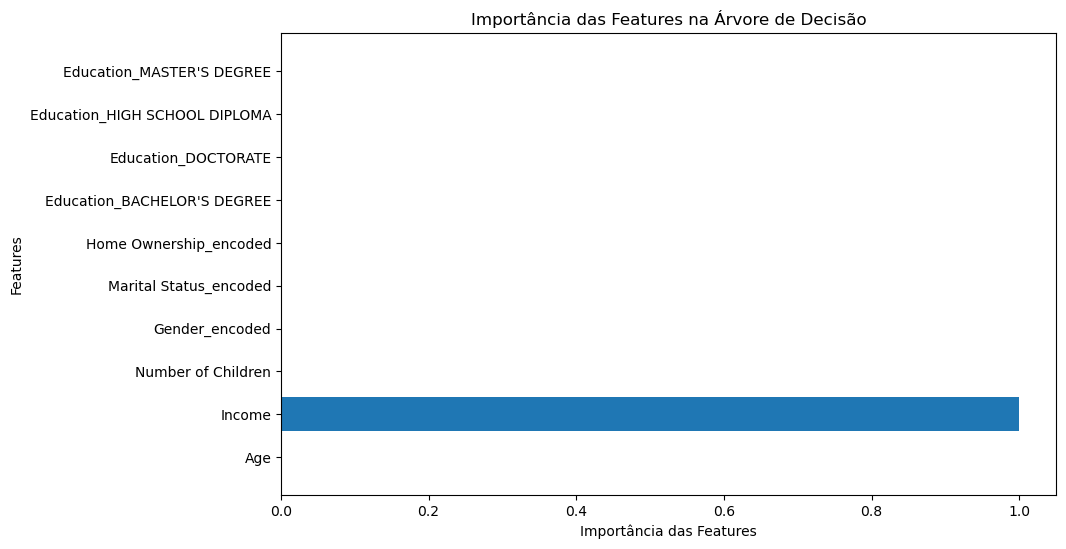

In [21]:
# A seguir veremos a importância das características do modelo de árvore de decisão:
importancias_features = arvore_Credit_Score.feature_importances_

# Obtendo os nomes das características:
nomes_features = X_test.columns

# A seguir criaremos um gráfico de barras para visualizar a importância das características:
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

In [ ]:
# Conforme gráfico acima, nota-se que a variável que mais faz sentido com a comparação com a coluna 'Credit Score', é a 'Income'.
# Faz sentido, pois dependendo do salário de cada pessoa, influenciará muito na faixa de crédito.
# o modelo está altamente dependente da renda e as demais variáveis não estão contribuindo para a decisão.
# A seguir faremos modificações a fim de balancear a influência das variáveis, usando padronização (StandardScaler) ou testando outro modelo como Random Forest para ver se outras variáveis ganham importância.

                         Feature  Importância  Importância Normalizada
0                            Age          0.0                      0.0
2             Number of Children          0.0                      0.0
3                 Gender_encoded          0.0                      0.0
4         Marital Status_encoded          0.0                      0.0
5         Home Ownership_encoded          0.0                      0.0
6    Education_BACHELOR'S DEGREE          0.0                      0.0
7            Education_DOCTORATE          0.0                      0.0
8  Education_HIGH SCHOOL DIPLOMA          0.0                      0.0
9      Education_MASTER'S DEGREE          0.0                      0.0
1                         Income          1.0                      1.0


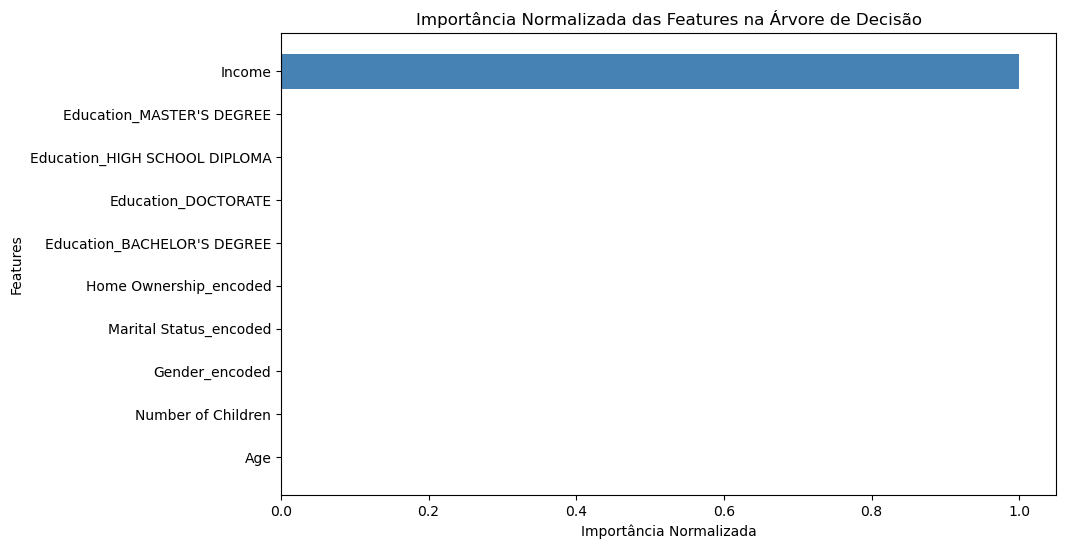

In [25]:
# A seguir definiremos as importâncias originais do modelo:
importancias_features = arvore_Credit_Score.feature_importances_

# A seguir definiremos os nomes das colunas:
nomes_features = X_test.columns

# A seguir criaremos um DataFrame para facilitar a manipulação:
df_importancias = pd.DataFrame({
    'Feature': nomes_features,
    'Importância': importancias_features
})

# A seguir normalizaremos as importâncias (soma = 1):
df_importancias['Importância Normalizada'] = df_importancias['Importância'] / df_importancias['Importância'].sum()

# A seguir ordenaremos da mais importante para a menos importante e printaremos o DataFrame:
df_importancias = df_importancias.sort_values(by='Importância Normalizada', ascending=True)

print(df_importancias)

# A seguir plotaremos o novo gráfico:
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Feature'], df_importancias['Importância Normalizada'], color='steelblue')
plt.xlabel('Importância Normalizada')
plt.ylabel('Features')
plt.title('Importância Normalizada das Features na Árvore de Decisão')
plt.show()


In [26]:
# A seguir identificaremos as colunas numéricas:
colunas_numericas = ['Age', 'Income', 'Number of Children']

# A seguir criaremos o scaler
scaler = StandardScaler()

# A seguir aplicaremos a padronização:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])


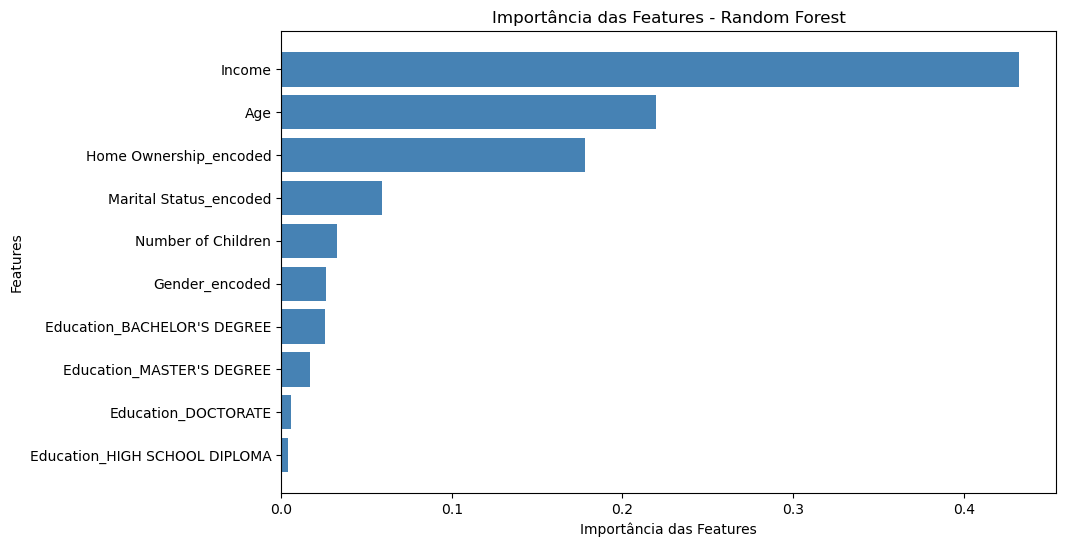

In [28]:
# A seguir criaremos e treinaremos o novo modelo: 
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_train_scaled, y_train.values.ravel())


importancias_rf = modelo_rf.feature_importances_

df_importancias_rf = pd.DataFrame({
    'Feature': X_test_scaled.columns,
    'Importância': importancias_rf
}).sort_values(by='Importância', ascending=True)

# A seguir plotaremos o novo gráfico, com os dados devidamente tratados:
plt.figure(figsize=(10, 6))
plt.barh(df_importancias_rf['Feature'], df_importancias_rf['Importância'], color='steelblue')
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.show()


In [ ]:
# Conforme novo gráfico acima, nota-se que as principais features são as 'Income', 'Age' e 'home Ownership_encoded'.

In [34]:
# A seguir criaremos e treinaremos a árvore com os dados escalados:
arvore_tratada = DecisionTreeClassifier(
    random_state=0,
    
)
arvore_tratada.fit(X_train_scaled, y_train.values.ravel()) 


DecisionTreeClassifier(random_state=0)

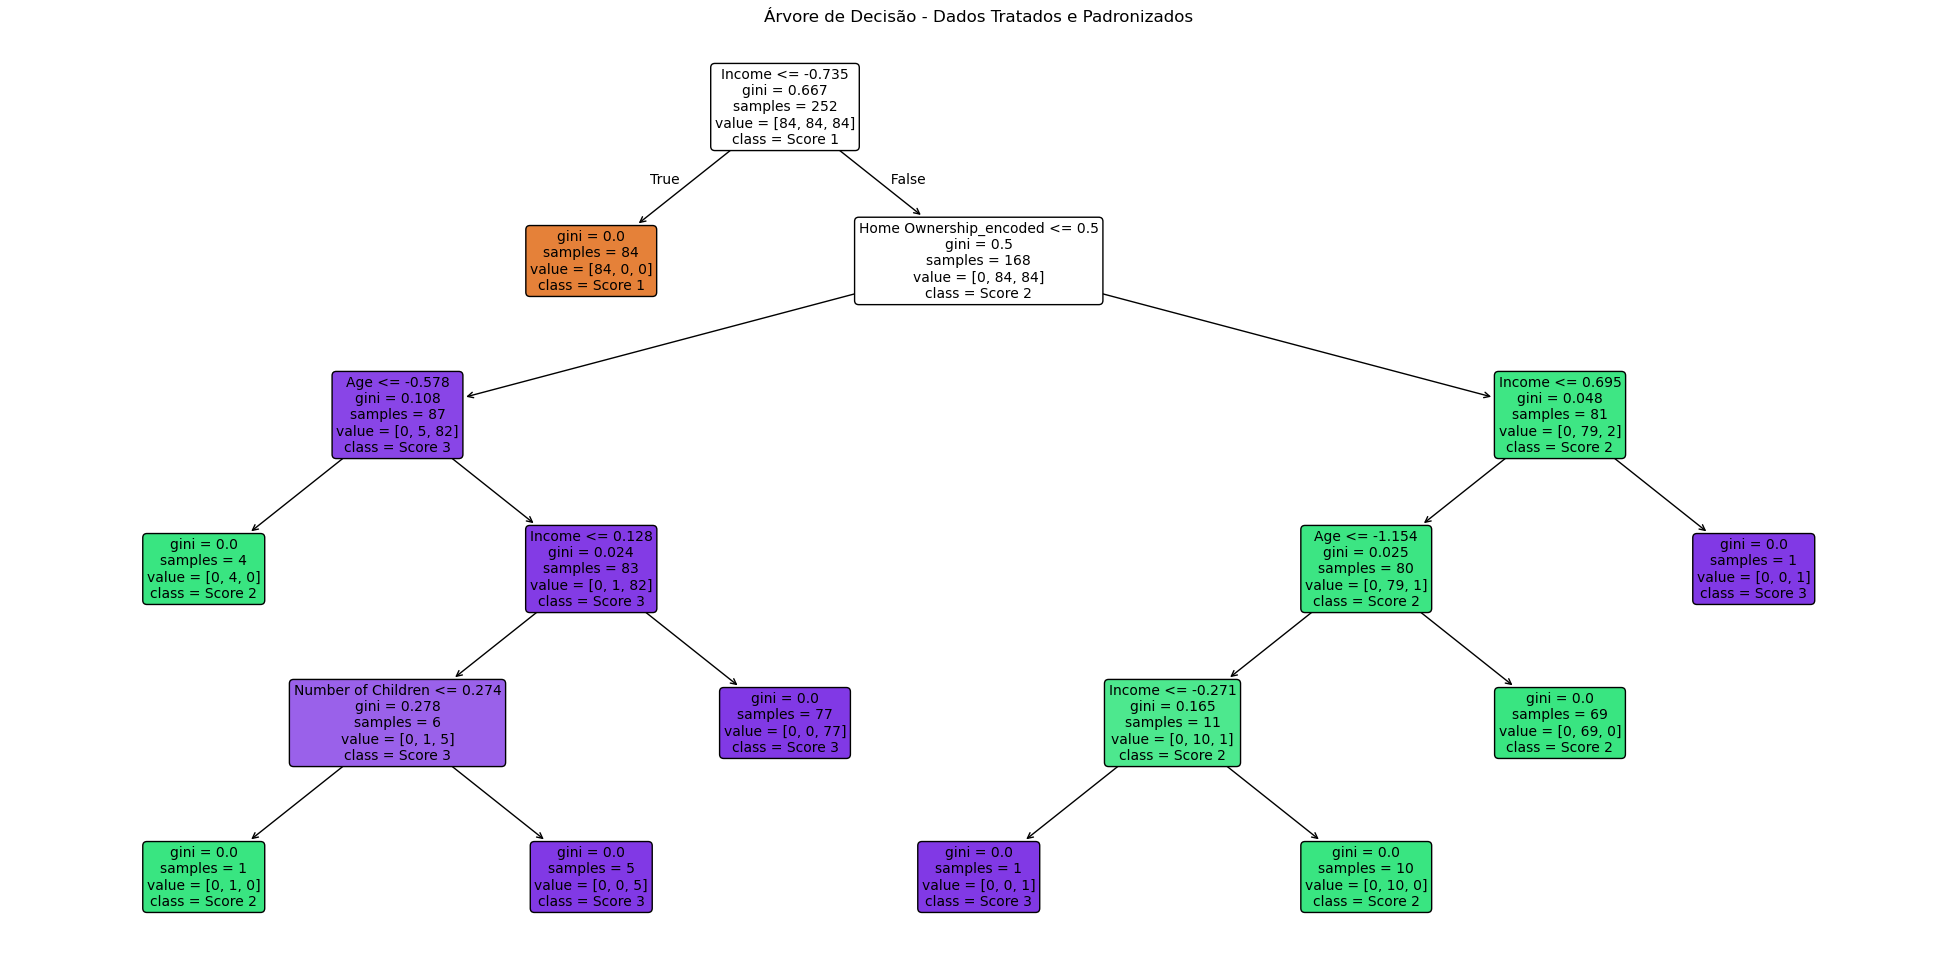

In [35]:
# A seguir plotaremos a árvore de decisão com os dados escalados:
plt.figure(figsize=(25, 12))
plot_tree(
    arvore_tratada,
    feature_names=X_train_scaled.columns,
    class_names=['Score 1', 'Score 2', 'Score 3'], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Árvore de Decisão - Dados Tratados e Padronizados')
plt.show()


In [ ]:
# Conforme árvore de decisão acima, nota-se que a mesma possui profundidade 5.
# A seguir algumas análises referente à árvore de decisão acima:
# Nota-se que a principal feature é a 'Income', na profundidade nível '0', pessoas que possuem salário <= 0.735, podem possuir Score 1 e o restante podem possuir Score 2.
# Na profunidade nível '1', para o que podem possuir Score 2, nota-se que a feature de decisão é 'Home Ownership', com o total de 164 linhas.
# Já na profundidade nível '2', há a subidivisão em 'Age' com 87 casos e 'Income' com 81 casos.


# 6) Identifique as 2 principais features do modelo.


In [ ]:
#seu código aqui
# Conforme analisado e calculado no enunciado número 5), identificamos as seguintes features principais após o escaler e padronização: 'Income' e 'Age'.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [36]:
#seu código aqui
# A seguir refinaremos o nosso modelo apenas com as 2 principais features:
X_train_scaled_reduzido = X_train_scaled[['Income', 'Age',]]
X_test_scaled_reduzido = X_test_scaled[['Income', 'Age',]]

In [37]:
# A seguir faremos a árvore de decisão na base de teste, apenas com as principais features:
arvore_score_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score_reduzido.fit(X_test_scaled_reduzido, y_test)

DecisionTreeClassifier(random_state=0)

In [38]:
previsoes_reduzido = arvore_score_reduzido.predict(X_test_scaled_reduzido)

In [39]:
# A seguir faremos o relatório para análise:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        29

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



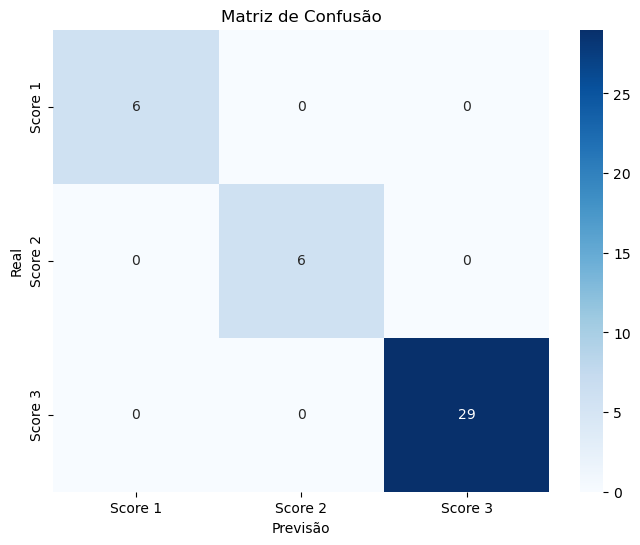

In [41]:
# A seguir faremos a matriz de confusão:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Score 1', 'Score 2', 'Score 3'],
            yticklabels=['Score 1', 'Score 2', 'Score 3'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Conforme relatório acima, nota-se que o modelo continua acertando 100% das previsões, chegando a '1.0' em todas as métricas de avaliação.
# Desta forma, o modelo atual é igualmente eficaz em comparação com o modelo anterior, que possui todas as features em suas definições.
# Conforme Matriz de Confusão acima, o modelo operou sem erros, acertando todas as previsões na base de teste.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
#Seu texto aqui
# Comparando os resultados obtidos neste exercício e no exercício do módulo 20 (Naive Bayes), identificamos que ambos possuem um bom resultado, porém o modelo de árvore de decisão é o melhor para este tipo de dados, onde observamos acima que acertou 100% de todas as previsões, enquanto a acurácia do modelo de Naive era de 0.92 e racall de 0.96.
# Pela matriz de confusão observamos que o modelo aplicando o algoritimo Naive cometeu alguns (poucos) erros.
# Já o modelo de árvore de decisão não cometeu nenhum erro, acertando 100% das previsões tanto na base de treino, quanto na base de teste.

In [ ]:
# Fim